# Projet numéro 4 sur les émissions de CO2 à Seattle : notebook d'analyse

##Sommaire

1. [Introduction](#Introduction)

2. [Comparaisons des Dataframes 2015 et 2016](#comparaison)

3. [Renommages des features](#Renommages)

4. [Traitement des valeurs manquantes](#TraitementNans)

5. [Localisation](#corr) 

6. [Traitement des valeurs abberantes](#createurs)

7. [Type d'immeubles à choisir](#createur) 






<a name="Introduction"></a>
## **Introduction**








### Problématique

**Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.**

Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Dans cette première partie, nous allons réaliser une courte analyse exploratoire après avoir nettoyé les données si besoin. Le but sera de déterminer les variables pertinentes ou d'en créer de nouvelles (feature engineering).

Des explications sur les variables se trouvent sur le site [suivant](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) .

Voyons les différentes unités des variables présentes dans notre dataframe de base.

Le [British Thermal Unit](https://www.totalenergies.fr/particuliers/parlons-energie/dossiers-energie/comprendre-le-marche-de-l-energie/btu-qu-est-ce-que-le-british-thermal-unit?gclid=CjwKCAjwzeqVBhAoEiwAOrEmzXZO-1Hvw5jmYRyDwSrK9NWtA9TAWPL2JzA-rmBMFHW4Q_-Tl_YEJhoC5qQQAvD_BwE) ou BTU est une unité d'énergie frigorifique très utilisée dans les pays anglosaxons et en asie.
Le BTU équivaut à 1055 Joules ou 252 calories. On a donc ici des Kilo British Thermal Unit, sf veut dire square feet, qui correspond aux mètres carrés qu'on retrouve d'ailleurs dans la taille et la surface des buildings.
Quand à l'unité lbs elle désigne 1 Pound qui est équivalent à environ 0.45 Kg.


### Version des différentes librairies utilisées :

In [ ]:
!python --version

Python 3.7.13


In [ ]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import folium
import folium.plugins

La bibliothèque NumPy permet d’effectuer des calculs numériques avec Python et introduit une gestion facilitée des tableaux de nombres.

La bilbiothèque MatplotLib permet de représenter des graphiques en 2D. Elle permet de produire une grande variété de graphiques et ils sont de grande qualité.

La bibliothèque Seaborn permet de créer des graphiques statistiques en Python. Elle est basée sur Matplotlib, et s'intègre avec les structures Pandas

Literal_eval permet d'évaluer des champs de caractères.

Voici les versions de nos différentes librairies utilisées :

In [ ]:
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy 1.21.6
pandas 1.3.5
seaborn 0.11.2
folium 0.8.3
re 2.2.1










<a name="comparaison"></a>
## **Comparaisons des Dataframes 2015 et 2016**




Analyse initiale des données sur les immeubles de Seattle :

In [ ]:
import re 
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
df_2015 = pd.read_csv('/content/drive/MyDrive/2015-building-energy-benchmarking.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2015.info()
display(df_2015.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [ ]:
df_2016 = pd.read_csv('/content/drive/MyDrive/2016-building-energy-benchmarking.csv')

display(df_2016.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


On regarde les colonnes qui sont différentes entre les données de 2015 et 2016.

In [ ]:

def compare_colums(input_df1, input_df2):
    set_1 = set(list(input_df1.columns))
    set_2 = set(list(input_df2.columns))
    return set_1.difference(set_2), set_2.difference(set_1)

def print_diff_columns(input_df, input_string):
    print('Les colonnes propres à ' + input_string + ' sont ')
    for element in input_df:
        print(element)

diff_columns_2015, diff_columns_2016 = compare_colums(df_2015,df_2016)
print_diff_columns(diff_columns_2015, '2015')
print()
print_diff_columns(diff_columns_2016, '2016')

Les colonnes propres à 2015 sont 
2010 Census Tracts
Zip Codes
Location
SPD Beats
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment

Les colonnes propres à 2016 sont 
GHGEmissionsIntensity
TotalGHGEmissions
Latitude
City
State
Longitude
Comments
Address
ZipCode


In [ ]:
diff_columns_2015, diff_columns_2016 = compare_colums(df_2015,df_2016)
diff_columns_2015

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [ ]:
diff_columns_2016

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}


On observe d'abord que l'adresse et la localisation des immeubles se font via la longitude et la latitude dans le dataset de 2015 alors qu'en 2016, elle est affichée directement pour chaque immeuble. 

GHGEmissions(MetricTonsCO2e) correspond à TotalGHGEmissions de 2016. On va donc renommer les variables et supprimer celles qui nous sont inutiles .

Cependant, nous devons vérifier que les données que nous avons sur la localisation des immeubles sont correctes et nous allons le faire en faisant une vérification de leur localisation (ce qui sera fait plus bas dans le Notebook).

<a name="Renommages"></a>

## **Renommages des features**




Dans le but de mettre en commun les Dataframes de 2015 et 2016, on va renommer les colonnes qui sont différentes de nom et mettre en commun des données comme la localisation et l'adresse des immeubles.

In [ ]:
df_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [ ]:
df_2015= pd.concat([df_2015.drop(['Location'], axis=1),df_2015['Location']
                               .map(literal_eval).apply(pd.Series)],axis=1)
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address']
                               .map(literal_eval).apply(pd.Series)], axis=1)

In [ ]:
df_2015["zip"] = pd.to_numeric(df_2015["zip"])
df_2015["latitude"] = pd.to_numeric(df_2015["latitude"])
df_2015["longitude"] = pd.to_numeric(df_2015["longitude"])

In [ ]:
df_2015 = df_2015.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})
display(df_2015.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121


### Traitement des colonnes Outlier et Comment : 

On observe ici que la colonne Outlier est low ou high. Cette colonne désigne si la consommation d'électricité de l'immeuble est plus basse ou plus haute que prévue. Je ne tiens pas vraiment compte de ce feature car on a déjà des valeurs sur ces consommations pour chaque building.

[Voici la documentation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8122780/)

In [ ]:
datatest= df_2015[['Outlier']]
datatest=datatest.dropna()
display(datatest)

,Outlier
3,High Outlier
62,Low Outlier
228,High Outlier
322,High Outlier
387,Low Outlier
...,...
3255,Low Outlier
3276,Low Outlier
3284,Low Outlier
3306,High Outlier


La colonne comment nous renseigne ici sur les années de début de construction de certaines habitations, et de leur localisation.

In [ ]:
display(df_2015[['Comment']].dropna())


,Comment
62,Under construction starting 6/2013 (old buildi...
436,"Part of McKinstry's campus, property operates ..."
437,One of two office buildings on McKinstry's cam...
595,"Part of McKinstry’s campus, this remodeled war..."
719,Construction completed in mid 2015. The buildi...
1358,Under construction starting 6/2013 (old buildi...
1360,Under construction starting 6/2013 (old buildi...
1373,Under construction starting 6/2015 (old buildi...
2108,Under construction starting 09/2014 (old build...
2230,"Part of McKinstry's campus, the office space f..."


En regardant les duplicates ici sur l'adresse on observe pas de problèmes particuliers étant donné le fait que certains immeubles à ID différents sont à la même adresse. Cela s'applique pour les années 2015 et 2016.

In [ ]:
display(df_2015[df_2015.duplicated(['Address'], keep=False)])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
69,103,2015,Nonresidential COS,Other,KEY ARENA - SEATTLE CENTER,1985200003,7,MAGNOLIA / QUEEN ANNE,1962,1,1.0,129000,0,129000,Other,Other,368000.0,NaN,NaN,NaN,NaN,NaN,NaN,79.7,78.7,167.7,167.7,29337400.0,28974828.0,8560000.0,4194724.0,14312992.0,0.0,0.0,6464408.0,760.51,5.42,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,18390,47.621241,-122.353432,305 HARRISON ST,SEATTLE,WA,98109
70,104,2015,Nonresidential COS,Other,BAGLEY WRIGHT THEATER - SEATTLE CENTER,1985200003,7,MAGNOLIA / QUEEN ANNE,1962,1,1.0,91213,0,91213,Other,Other,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,78.0,85.9,201.2,216.1,5069854.0,5580583.0,1270000.0,1061505.0,3622005.0,0.0,0.0,177849.0,123.28,1.18,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,18390,47.621241,-122.353432,305 HARRISON ST,SEATTLE,WA,98109
71,106,2015,Nonresidential COS,Other,ARMORY - SEATTLE CENTER,1985200305,7,MAGNOLIA / QUEEN ANNE,1938,1,5.0,396085,0,396085,Other,Other,278500.0,NaN,NaN,NaN,NaN,NaN,NaN,97.6,96.5,166.8,167.7,27185096.0,26880068.0,10951000.0,2334143.0,7964427.0,0.0,0.0,8269669.0,900.81,2.19,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,18390,47.621890,-122.350275,305 HARRISON ST,SEATTLE,WA,98109
73,110,2015,Nonresidential COS,Other,EXHIBITION HALL - SEATTLE CENTER,1988200440,7,MAGNOLIA / QUEEN ANNE,1962,1,2.0,49680,0,49680,Other,Other,52000.0,NaN,NaN,NaN,NaN,NaN,NaN,50.6,49.4,102.4,101.3,2632472.0,2568666.0,1145000.0,336891.0,1149520.0,0.0,0.0,337952.0,96.39,1.84,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,18390,47.623936,-122.351930,301 MERCER ST,SEATTLE,WA,98109
74,111,2015,Nonresidential COS,Other,MERCER ARENA - SEATTLE CENTER,1988200700,7,MAGNOLIA / QUEEN ANNE,1928,1,1.0,60696,0,60696,Other,Other,108000.0,NaN,NaN,NaN,NaN,NaN,NaN,8.6,8.6,26.9,26.9,924980.0,924980.0,0.0,271096.0,925018.0,0.0,0.0,0.0,6.45,0.04,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,18390,47.623881,-122.349970,301 MERCER ST,SEATTLE,WA,98109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,49738,2015,NonResidential,Other,JEFFERSON SQUARE (RETAIL PORTION),7579200260,1,SOUTHWEST,1987,1,6.0,146363,0,146363,Strip Mall,Strip Mall,146363.0,NaN,NaN,NaN,NaN,NaN,NaN,80.6,85.3,176.6,179.2,11799105.0,12488556.0,0.0,1886487.0,6436961.0,53624.0,5362411.0,0.0,329.67,2.06,No,NaN,Compliant,NaN,NaN,1.0,NaN,50.0,18795,47.559898,-122.384621,4100 SW EDMUNDS ST,SEATTLE,WA,98116
3269,49850,2015,NonResidential,K-12 School,LAKESIDE BUILDING- PAUL ALLEN ATHLETIC CENTER,2832100190,5,NORTHWEST,2014,1,2.0,48925,0,48925,K-12 School,K-12 School,63500.0,NaN,NaN,NaN,NaN,NaN,72.0,34.7,37.7,82.5,85.7,2202114.0,2395253.0,0.0,420015.0,1433150.0,7690.0,769023.0,0.0,50.83,0.91,No,NaN,Compliant,NaN,117.0,46.0,2.0,33.0,19579,47.731823,-122.326251,14050 1ST AVE NE,SEATTLE,WA,98125
3273,49862,2015,Nonresidential COS,Other,SCT TECHNICAL PAVILION - SEATTLE CENTER,1985200130,7,MAGNOLIA / QUEEN ANNE,1962,1,1.0,29000,0,29000,Other,Other,25100.0,NaN,NaN,NaN,NaN,NaN,NaN,93.9,105.

In [ ]:
display(df_2016[df_2016.duplicated(['Address'], keep=False)])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
21,27,2016,NonResidential,Other,King County Correctional Facility,500 5TH AVE,Seattle,WA,98104.0,0942001010,3,DOWNTOWN,47.60378,-122.32842,1985,1.0,19,385274,0,385274,Other,Other,385274.0,NaN,NaN,NaN,NaN,NaN,NaN,124.199997,128.600006,229.500000,232.899994,4.785981e+07,4.953921e+07,0.0,5.351014e+06,1.825766e+07,296021.500000,29602150.0,False,NaN,Compliant,NaN,1699.45,4.41
135,223,2016,NonResidential,Retail Store,Westwood Village - Building A,2600 SW Barton St,Seattle,WA,98126.0,3624039009,1,DELRIDGE,47.52254,-122.36627,1966,1.0,1,64984,0,64984,Retail Store,Retail Store,65425.0,NaN,NaN,NaN,NaN,NaN,72.0,45.000000,46.099998,130.699997,130.699997,2.944296e+06,3.016374e+06,0.0,7.660278e+05,2.613687e+06,3306.090088,330609.0,False,NaN,Compliant,NaN,35.78,0.55
136,224,2016,NonResidential,Retail Store,Westwood Village - Building B,2600 SW Barton St,Seattle,WA,98126.0,3624039009,1,DELRIDGE,47.52254,-122.36627,1965,1.0,1,67745,0,67745,Retail Store,Retail Store,67782.0,NaN,NaN,NaN,NaN,NaN,37.0,136.199997,141.500000,223.899994,227.300003,9.230223e+06,9.589728e+06,0.0,7.690803e+05,2.624102e+06,66061.210940,6606121.0,False,NaN,Compliant,NaN,369.14,5.45
156,247,2016,Nonresidential COS,Distribution Center,SCL SSC Building A,3613 4th Ave S,Seattle,WA,98134.0,7666205660,2,GREATER DUWAMISH,47.57199,-122.32811,1924,1.0,2,179161,0,179161,"Data Center, Distribution Center, Office, Other",Distribution Center,117476.0,Office,37321.0,Other,25543.0,NaN,NaN,52.200001,56.299999,156.300003,167.600006,9.436408e+06,1.016852e+07,0.0,2.570957e+06,8.772104e+06,6643.020020,664302.0,False,NaN,Compliant,NaN,96.43,0.54
157,248,2016,Nonresidential COS,Warehouse,SCL SSC Building B,3613 4th Ave S,Seattle,WA,98134.0,7666205660,2,GREATER DUWAMISH,47.57199,-122.32811,1965,1.0,2,58640,0,58640,"Non-Refrigerated Warehouse, Office, Other, Oth...",Non-Refrigerated Warehouse,40831.0,Other - Services,16735.0,Office,11533.0,NaN,NaN,55.900002,61.500000,175.399994,193.199997,3.928695e+06,4.327564e+06,0.0,1.151435e+06,3.928695e+06,0.000000,0.0,False,NaN,Compliant,NaN,27.39,0.47
164,264,2016,NonResidential,Mixed Use Property,TriBeCa,516 1st Ave W,Seattle,WA,98119.0,8681450000,7,MAGNOLIA / QUEEN ANNE,47.62390,-122.35756,2002,1.0,4,110785,0,110785,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,58563.0,Supermarket/Grocery Store,48520.0,Parking,29839.0,NaN,NaN,95.300003,98.099998,291.399994,299.000000,1.055791e+07,1.086403e+07,0.0,2.971734e+06,1.013956e+07,4183.540039,418354.0,False,NaN,Compliant,NaN,92.91,0.84
245,370,2016,NonResidential,Large Office,Metropolitan Park West,1100 Olive Way,Seattle,WA,98101.0,0660002054,7,DOWNTOWN,47.61597,-122.33086,1980,1.0,18,413715,64660,349055,"Office, Parking",Office,348270.0,Parking,69634.0,NaN,NaN,20162015201320122010,79.0,69.599998,69.599998,218.399994,218.399994,2.422489e+07,2.422489e+07,0.0,7.099908e+06,2.422489e+07,0.000000,0.0,False,NaN,Compliant,NaN,168.88,0.41
348,490,2016,NonResidential,Small- and Mid-Sized Office,North Tower,100 West Harrison,Seattle,WA,98119.0,1989200720,7,MAGNOLIA / QUEEN ANNE,47.62224,-122.35850,1972,1.0,5,87178,20416,66762,"Office, Parking",Office,66648.0,Parking,15167.0,NaN,NaN,NaN,69.0,54.500000,57.59

<a name="TraitementNans"></a>
## **Traitement des valeurs manquantes**


###Traitement des valeurs manquantes pour l'année 2015

In [ ]:
df_2015.isnull().sum().sort_values()

OSEBuildingID                                                       0
City                                                                0
Address                                                             0
Longitude                                                           0
Latitude                                                            0
Zip Codes                                                           0
ComplianceStatus                                                    0
State                                                               0
PropertyGFABuilding(s)                                              0
PropertyGFAParking                                                  0
PropertyGFATotal                                                    0
ZipCode                                                             0
NumberofBuildings                                                   0
YearBuilt                                                           0
DataYear            

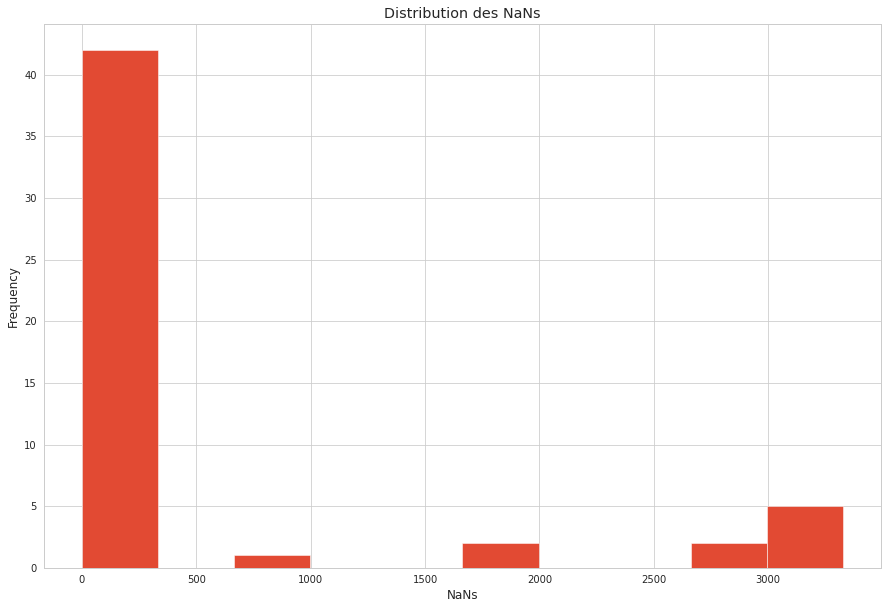

In [ ]:
df_2015.isnull().sum().plot(kind='hist', figsize=(15,10))
plt.title('Distribution des NaNs')
plt.xlabel('NaNs')
#todo:afficher certaines colonnes comme les outliers et les comments
plt.show()

On va ici éliminer toutes les variables ayant plus de 75 pourcent de données nulles car elles seront peu utilisables.

In [ ]:
def delete_nans(dftest) :

  column_with_nan = dftest.columns[dftest.isnull().any()]
  for column in column_with_nan:
        if dftest[column].isnull().sum()*100.0/dftest.shape[0] > 80:
                dftest.drop(column,1, inplace=True)

In [ ]:
delete_nans(df_2015)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 45 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   CouncilDistrictCode                                            3340 non-null   int64  
 7   Neighborhood                                                


GHGEmissions(MetricTonsCO2e): correspond à la colonne TotalGHGEmissions du fichier 2016 => on renomme la colonne

GHGEmissionsIntensity(kgCO2e/ft2): correspond à la colonne GHGEmissionsIntensity du fichier 2016 => on renomme la colonne

Eliminons maintenant les colonnes de 2015 n'ayant pas d'equivalents en 2016

In [ ]:
df_2015=df_2015.drop(['OtherFuelUse(kBtu)',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'SPD Beats', 'Zip Codes'], axis=1)

Renommons les trois colonnes de 2015 qui restent ainsi que de 2016 a l'identique

In [ ]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})

df_2016 = df_2016.drop(['Comments'], axis=1)


####Traitement des valeurs manquantes pour l'année 2016

In [ ]:
df_2016.isnull().sum().sort_values()

OSEBuildingID                         0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
YearBuilt                             0
Longitude                             0
Latitude                              0
Neighborhood                          0
DefaultData                           0
CouncilDistrictCode                   0
ComplianceStatus                      0
State                                 0
City                                  0
Address                               0
PropertyName                          0
PrimaryPropertyType                   0
BuildingType                          0
DataYear                              0
TaxParcelIdentificationNumber         0
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SiteEUIWN(kBtu/sf)                    6
SiteEUI(kBtu/sf)                      7
NumberofBuildings                     8


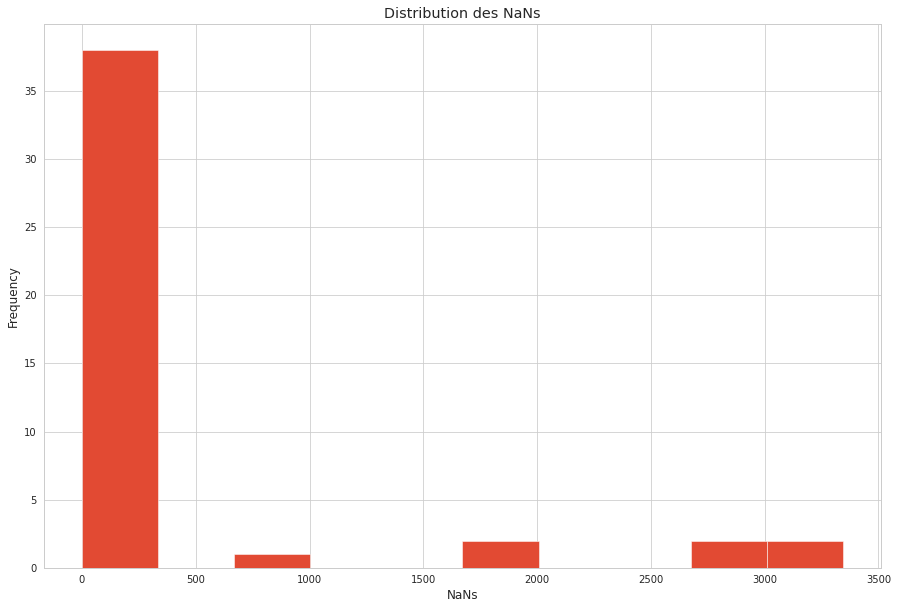

In [ ]:
df_2016.isnull().sum().plot(kind='hist', figsize=(15,10))
plt.title('Distribution des NaNs')
plt.xlabel('NaNs')

plt.show()

In [ ]:
delete_nans(df_2016)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
diff_columns_2015, diff_columns_2016 = compare_colums(df_2015,df_2016)
print(diff_columns_2015,diff_columns_2016)

set() set()


In [ ]:
datas = pd.concat([df_2015[df_2016.columns],df_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
datas.shape
display(datas.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101.0,659000030,7,DOWNTOWN,47.612190,-122.337997,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,Compliant,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101.0,659000220,7,DOWNTOWN,47.613106,-122.333358,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,Compliant,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101.0,659000475,7,DOWNTOWN,47.613349,-122.337699,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Yes,Compliant,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101.0,659000640,7,DOWNTOWN,47.614216,-122.336609,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,No,Compliant,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121.0,659000970,7,DOWNTOWN,47.613754,-122.340924,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,No,Compliant,507.70,4.02


In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   Address                          6716 non-null   object 
 6   City                             6716 non-null   object 
 7   State                            6716 non-null   object 
 8   ZipCode                          6700 non-null   float64
 9   TaxParcelIdentificationNumber    6714 non-null   object 
 10  CouncilDistrictCode              6716 non-null   int64  
 11  Neighborhood                     6716 non-null   object 
 12  Latitude            

<a name="corr"></a>

## **Localisation**

On vérifie ici que nos immeubles se situent bien à Seattle et, en effet, c'est bien le cas. Nous avons donc bien des immeubles se situant dans les environs de Seattle.

In [ ]:

bresil_lat = -14.242914500000001
bresil_lon = -53.1892665
bresil_map = folium.Map(location=[bresil_lat, bresil_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(bresil_map)
for lat, lng, in zip(datas.Latitude, datas.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

<a name="createurs"></a>
## **Traitement des valeurs aberrantes**


On va regarder si certains valeurs de features n'ont pas de sens et si elles sont aberrantes. 

In [ ]:
datas.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,6716.000000,6716.00000,6700.000000,6716.000000,6716.000000,6716.000000,6716.000000,6708.000000,6708.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,3238.000000,5093.000000,6699.000000,6700.000000,6697.000000,6697.000000,6.701000e+03,6.700000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6697.000000,6697.000000
mean,20867.420488,2015.50268,98116.843582,4.445057,47.624062,-122.334904,1968.101549,1.071407,4.695736,9.281410e+04,9519.597975,8.329450e+04,7.707936e+04,28074.100153,67.906342,54.182341,57.308522,133.510303,138.356802,5.194673e+06,5.240110e+06,2.625076e+05,1.052458e+06,3.591058e+06,1.311223e+04,1.311223e+06,114.935638,1.081154
std,11878.968174,0.50003,17.730253,2.123749,0.047837,0.027185,33.020391,1.593505,5.476218,1.875062e+05,33868.050881,1.733470e+05,1.681617e+05,53473.984688,27.012124,55.101657,56.390651,135.677195,135.302508,1.813648e+07,1.500896e+07,3.704221e+06,3.659769e+06,1.248728e+07,5.685626e+04,5.685627e+06,478.876573,1.734763
min,1.000000,2015.00000,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,19934.000000,2015.00000,98105.000000,3.000000,47.599857,-122.350603,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727300e+04,2.501600e+04,4993.000000,52.000000,27.600000,29.600000,74.000000,79.199997,9.200689e+05,9.818029e+05,0.000000e+00,1.867660e+05,6.372730e+05,0.000000e+00,0.000000e+00,9.450000,0.160000
50%,23064.000000,2016.00000,98115.000000,4.000000,47.618608,-122.332630,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218500e+04,3.953000e+04,10631.000000,75.000000,38.000000,40.900000,95.600000,102.099998,1.791071e+06,1.926136e+06,0.000000e+00,3.422434e+05,1.167735e+06,3.051000e+03,3.051000e+05,33.180000,0.540000
75%,25868.250000,2016.00000,98122.000000,7.000000,47.657135,-122.319733,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,26462.000000,90.000000,60.200000,64.925001,143.900000,149.800000,4.135280e+06,4.377974e+06,0.000000e+00,8.198140e+05,2.797320e+06,1.149639e+04,1.149639e+06,91.530000,1.280000
max,50226.000000,2016.00000,98272.000000,7.000000,47.733870,-122.220470,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


### Valeurs négatives

On notera d'abord qu'il est normal que la latitude et la longitude puissent avoir des valeurs négatives comme on l'observe dans notre graphique ci-dessous.
On a aussi observé cela dans la carte de Seattle affichée dans ce Notebook.

Ensuite, les valeurs négatives des émissions de Gaz et de la consommation d'électricité peuvent s'expliquer par le fait que les immeubles concernés produisent de l'[énergie solaire](https://www.edf.fr/groupe-edf/espaces-dedies/l-energie-de-a-a-z/tout-sur-l-energie/produire-de-l-electricite/qu-est-ce-que-l-energie-solaire).





/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


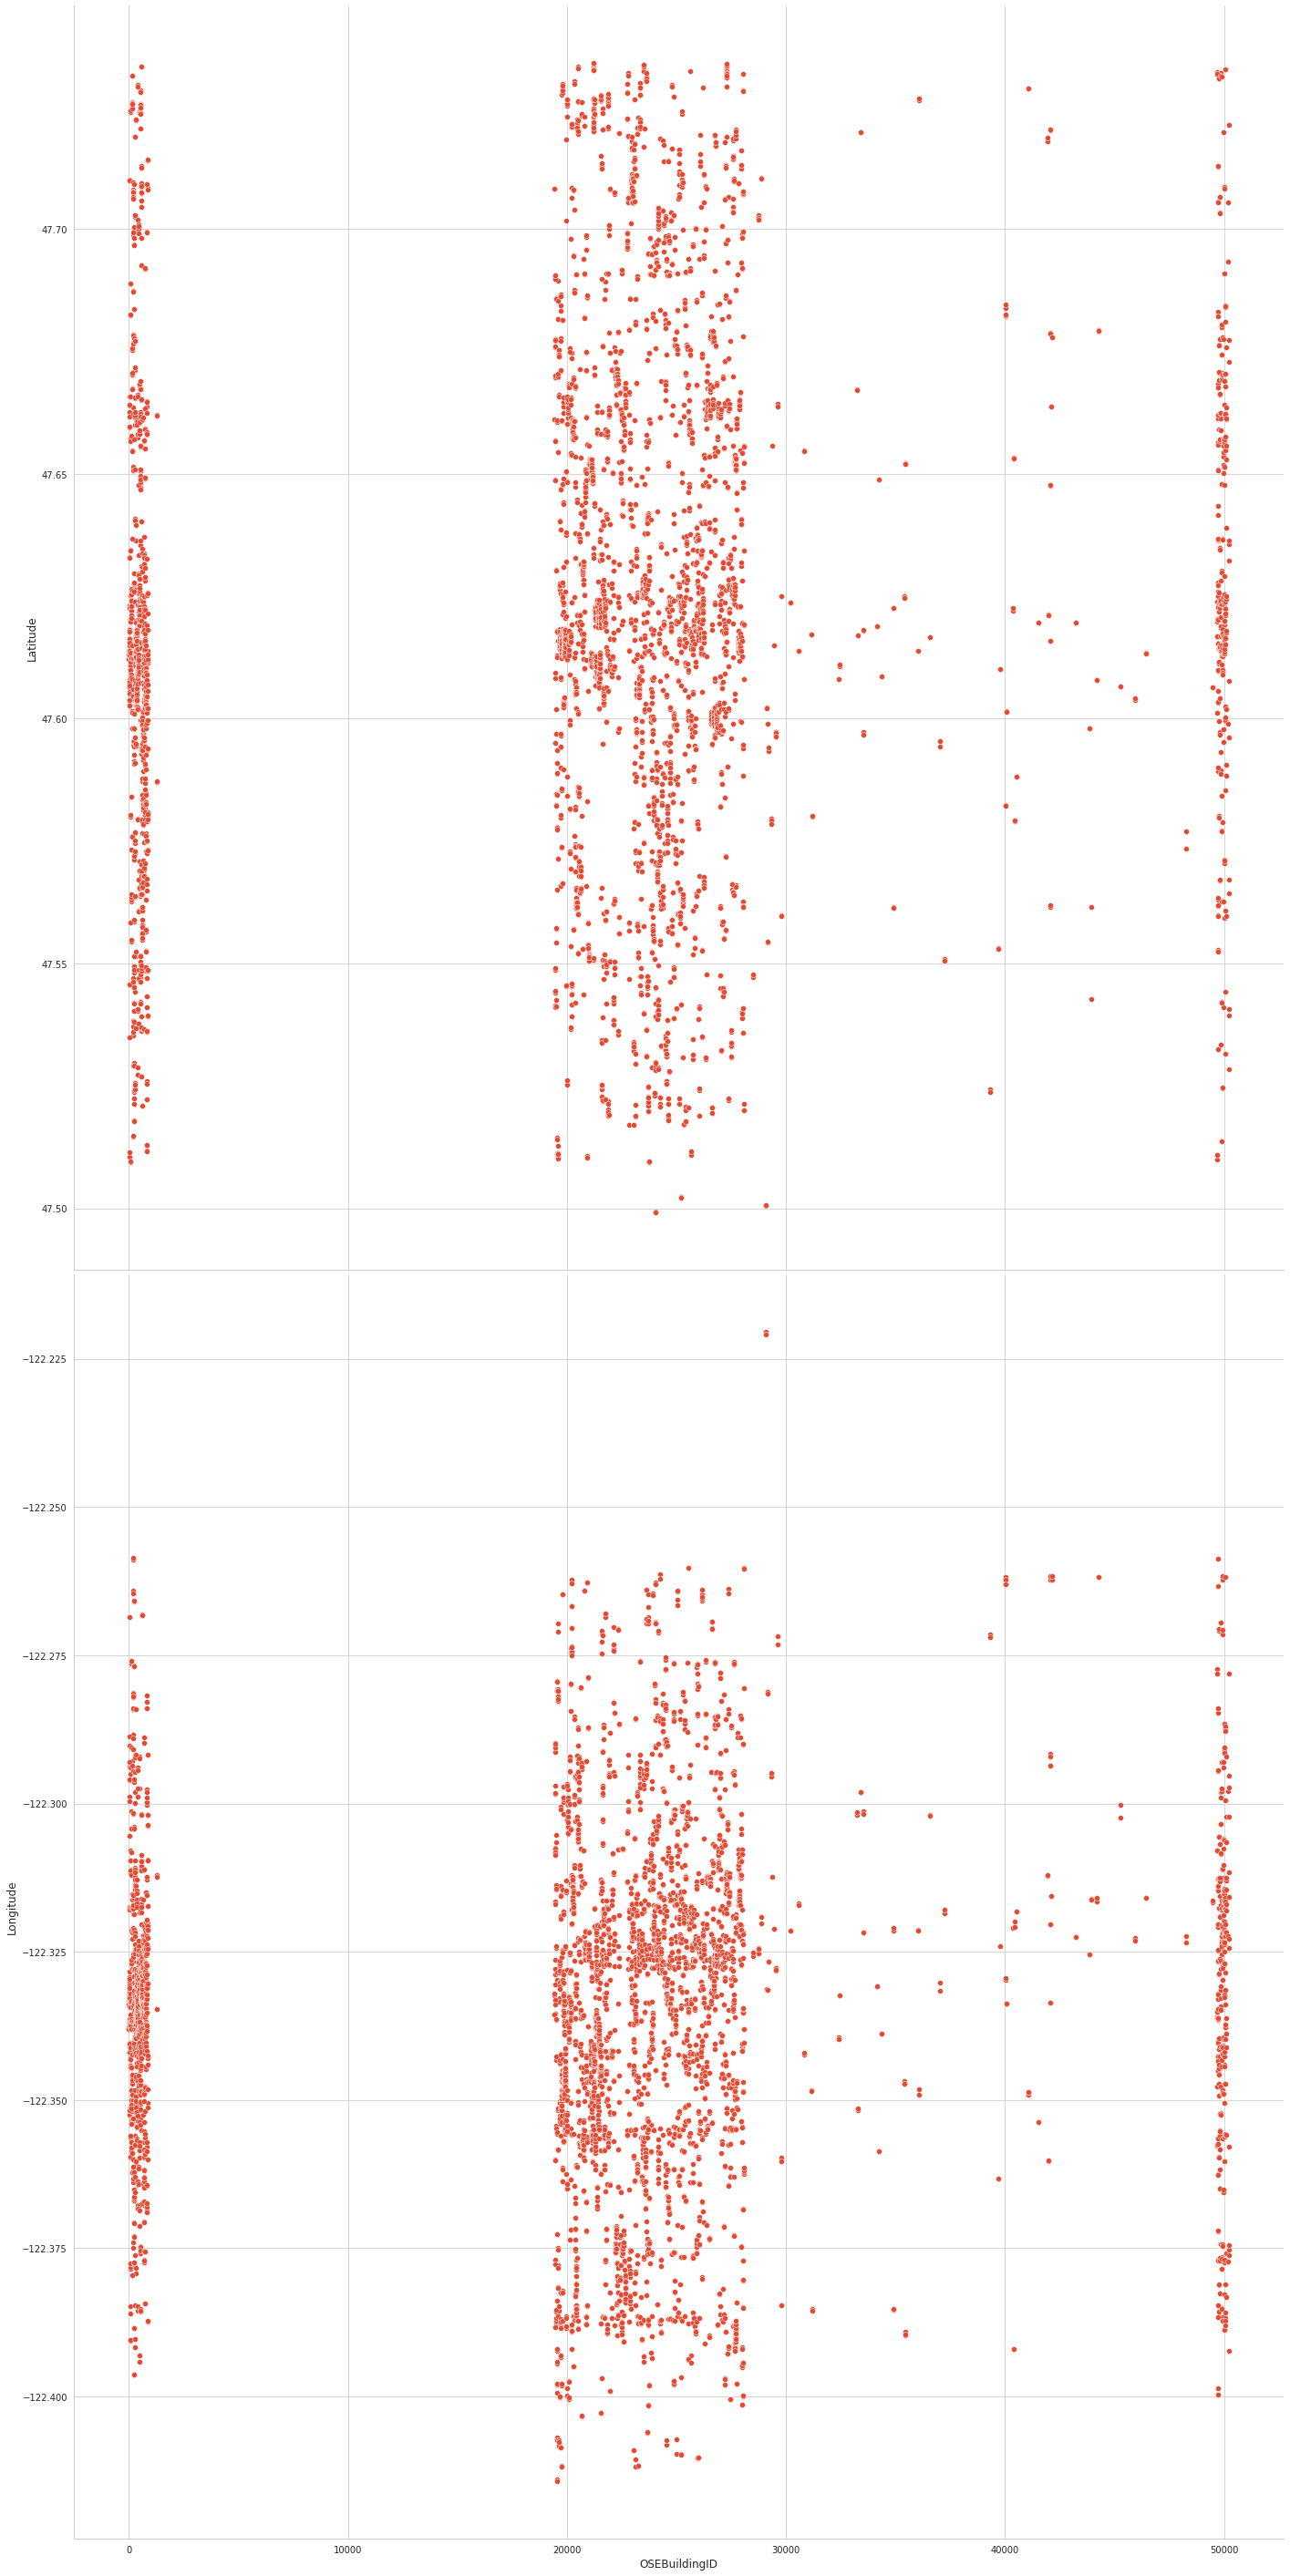

In [ ]:
sns.pairplot(datas, size=20, 
            x_vars=['OSEBuildingID'],
            y_vars= ['Latitude', 'Longitude'])

plt.show()

On choisit cependant de nettoyer ces valeurs négatives car nous n'avons pas de preuve que ces valeurs négatives sont forcément la conséquence de l'utilisation de l'énergie solaire.

In [ ]:
quantitative_columns = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
                        'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
for column in quantitative_columns:
    incoherent_values = datas[datas[column] <=0]
    if(incoherent_values.shape[0]>0):
        print(column)
        display(incoherent_values)
        datas.drop(incoherent_values.index)

SourceEUI(kBtu/sf)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,No,Compliant,0.00,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,No,Compliant,0.00,0.00
3246,49784,2015,NonResidential,Small- and Mid-Sized Office,BULLITT CENTER,1501 E MADISON ST,SEATTLE,WA,98122.0,7234600195,3,CENTRAL,47.614350,-122.312464,2013,1.0,6.0,41929,0,41929,Office,Office,48159.0,NaN,NaN,100.0,11.700000,11.700000,-2.0,-2.0,562479.0,5.624790e+05,0.0,1.648530e+05,562503.0,0.000000,0.0,No,Compliant,3.92,0.04
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.632900,-122.351720,1989,1.0,2.0,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,4.386917e+05,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.509700,-122.377590,1948,1.0,2.0,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,1.760881e+05,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.563600,-122.358000,1999,1.0,3.0,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,4.977068e+05,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.573240,-122.290580,1991,1.0,2.0,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,6.879069e+05,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.654640,-122.349120,1991,1.0,3.0,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,6.167308e+05,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.696750,-122.377600,1959,1.0,1.0,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000

SiteEnergyUse(kBtu)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,No,Compliant,0.00,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,No,Compliant,0.00,0.00
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.632900,-122.351720,1989,1.0,2.0,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.509700,-122.377590,1948,1.0,2.0,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.563600,-122.358000,1999,1.0,3.0,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.573240,-122.290580,1991,1.0,2.0,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.654640,-122.349120,1991,1.0,3.0,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.696750,-122.377600,1959,1.0,1.0,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,Missing Data,229.38,1.43
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.597960,-122.304150,1963,1.0,3.0,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,Missing Data,170.90,1.25


SiteEUI(kBtu/sf)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,No,Compliant,0.00,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,No,Compliant,0.00,0.00
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.632900,-122.351720,1989,1.0,2.0,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.509700,-122.377590,1948,1.0,2.0,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.563600,-122.358000,1999,1.0,3.0,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.573240,-122.290580,1991,1.0,2.0,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.654640,-122.349120,1991,1.0,3.0,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.696750,-122.377600,1959,1.0,1.0,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,Missing Data,229.38,1.43
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.597960,-122.304150,1963,1.0,3.0,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,Missing Data,170.90,1.25


TotalGHGEmissions


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,No,Compliant,0.0,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,No,Compliant,0.0,0.00
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.698230,-122.321260,1989,1.0,2.0,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,7,DOWNTOWN,47.611950,-122.331670,1990,1.0,6.0,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Non-Compliant,0.0,0.00
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,7,MAGNOLIA / QUEEN ANNE,47.637180,-122.377340,2008,1.0,1.0,57176,0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,31.0,208.800003,214.100006,0.0,0.0,1.252517e+07,1.284386e+07,0.0,0.00000,0.0,0.0,0.0,False,Compliant,0.0,0.00
746,19776,2016,NonResidential,Other,Welcome Home Society - PriceCo,13537 Aurora Ave N,Seattle,WA,98133.0,0164000020,5,NORTHWEST,47.727770,-122.345030,2002,1.0,1.0,29924,0,29924,Other - Education,Other - Education,29924.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
760,19801,2016,Multifamily LR (1-4),Other,APEX BELLTOWN COOP,2225 First Ave,Seattle,WA,98121.0,0246300000,7,DOWNTOWN,47.612940,-122.346380,1909,1.0,3.0,30700,0,30700,"Multifamily Housing, Other",Other,19034.0,Multifamily Housing,11666.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
1323,21524,2016,Multifamily LR (1-4),Low-Rise Multifamily,Minor Tower Apartments,2525 Minor Ave E,Seattle,WA,98102.0,2025049091,4,LAKE UNION,47.642720,-122.328660,1974,1.0,4.0,37361,4735,32626,Multifamily Housing,Multifamily Housing,27732.0,NaN,NaN,61.0,31.700001,33.200001,0.0,0.0,8.801155e+05,9.197677e+05,0.0,0.00000,0.0,0.0,0.0,False,Compliant,0.0,0.00
1361,21616,2016,SPS-District K-12,K-12 School,Olympic Hills Elementary,13018 20th Ave. N.E.,Seattle,WA,98125.0,2126049041,5,

GHGEmissionsIntensity


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,No,Compliant,0.00,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,No,Compliant,0.00,0.00
599,797,2015,NonResidential,Refrigerated Warehouse,SEATTLE COLD STORAGE,303 S RIVER ST,SEATTLE,WA,98108.0,5367204100,2,GREATER DUWAMISH,47.543298,-122.330878,1969,1.0,1.0,71718,0,71718,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,0.900000,2.9,2.9,9.380200e+04,9.380200e+04,0.0,27492.000000,93806.0,0.0,0.0,No,Compliant,0.65,0.00
1239,21315,2015,NonResidential,Small- and Mid-Sized Office,1518 5TH AVE OFFICE,1520 5TH AVE,SEATTLE,WA,98101.0,1975700135,7,DOWNTOWN,47.611309,-122.335723,1903,1.0,3.0,57720,0,57720,Office,Office,25000.0,NaN,NaN,100.0,1.800000,1.800000,5.5,5.5,4.394300e+04,4.394300e+04,0.0,12879.000000,43945.0,0.0,0.0,No,Compliant,0.31,0.00
1306,21474,2015,NonResidential,Other,SULTAN HOTEL/LUSTY LADY,1315 1ST AVE,SEATTLE,WA,98101.0,1976200060,7,DOWNTOWN,47.607051,-122.339036,1900,1.0,3.0,49760,0,49760,Other,Other,24019.0,NaN,NaN,NaN,1.000000,1.000000,3.2,3.2,2.412600e+04,2.412600e+04,0.0,7071.000000,24127.0,0.0,0.0,No,Compliant,0.17,0.00
1594,22548,2015,NonResidential,Self-Storage Facility\n,SELF STORAGE MINI WAREHOUSE,2648 15TH AVE W,SEATTLE,WA,98119.0,2770603955,7,MAGNOLIA / QUEEN ANNE,47.644213,-122.375748,1915,1.0,3.0,39952,0,39952,Self-Storage Facility,Self-Storage Facility,39952.0,NaN,NaN,NaN,1.300000,1.400000,4.2,4.3,5.340100e+04,5.511300e+04,0.0,15651.000000,53404.0,0.0,0.0,No,Compliant,0.37,0.00
1916,23730,2015,NonResidential,Non-Refrigerated Warehouse,SALMON BAY TERMINALS - RSVP BLDG,4021 13TH AVE W,SEATTLE,WA,98119.0,7666200120,7,MAGNOLIA / QUEEN ANNE,47.656859,-122.375239,1948,1.0,1.0,46970,0,46970,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,46970.0,NaN,NaN,NaN,0.200000,0.200000,0.8,0.8,1.144100e+04,1.144100e+04,0.0,3353.000000,11442.0,0.0,0.0,No,Compliant,0.08,0.00
2212,24717,2015,NonResidential,Other,1701 1ST AVE S,1701 1ST AVE S,SEATTLE,WA,98134.0,7666207085,2,GREATER DUWAMISH,47.587876,-122.334577,1910,1.0,3.0,27690,0,27690,"Other, Parking",Other,24717.0,Parking,0.0,NaN,0.700000,0.700000,2.2,2.2,1.715000e+04,1.715000e+04,0.0,5026.000000,17150.0,0.0,0.0,No,Compliant,0.12,0.00
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,False,Missing Data,0.00,0.00
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.698230,-122.321260,1989,1.0,2.0,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,0.000000

On supprime ici les immeubles ayant une valeur de CO2 nulle ou négative.

In [ ]:
datasdelete =  datas[datas['TotalGHGEmissions'] <=0]
display(datasdelete)
datas = datas.drop(datas.index[datas['TotalGHGEmissions'] <= 0])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1525 4TH AVE,SEATTLE,WA,98101.0,1975700365,7,DOWNTOWN,47.610764,-122.337677,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,No,Compliant,0.0,0.00
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1218 3RD AVE,SEATTLE,WA,98101.0,1975200005,7,DOWNTOWN,47.607655,-122.335512,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,No,Compliant,0.0,0.00
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.622660,-122.305470,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.698230,-122.321260,1989,1.0,2.0,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,7,DOWNTOWN,47.611950,-122.331670,1990,1.0,6.0,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Non-Compliant,0.0,0.00
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,7,MAGNOLIA / QUEEN ANNE,47.637180,-122.377340,2008,1.0,1.0,57176,0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,31.0,208.800003,214.100006,0.0,0.0,1.252517e+07,1.284386e+07,0.0,0.00000,0.0,0.0,0.0,False,Compliant,0.0,0.00
746,19776,2016,NonResidential,Other,Welcome Home Society - PriceCo,13537 Aurora Ave N,Seattle,WA,98133.0,0164000020,5,NORTHWEST,47.727770,-122.345030,2002,1.0,1.0,29924,0,29924,Other - Education,Other - Education,29924.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
760,19801,2016,Multifamily LR (1-4),Other,APEX BELLTOWN COOP,2225 First Ave,Seattle,WA,98121.0,0246300000,7,DOWNTOWN,47.612940,-122.346380,1909,1.0,3.0,30700,0,30700,"Multifamily Housing, Other",Other,19034.0,Multifamily Housing,11666.0,NaN,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.00000,0.0,0.0,0.0,False,Missing Data,0.0,0.00
1323,21524,2016,Multifamily LR (1-4),Low-Rise Multifamily,Minor Tower Apartments,2525 Minor Ave E,Seattle,WA,98102.0,2025049091,4,LAKE UNION,47.642720,-122.328660,1974,1.0,4.0,37361,4735,32626,Multifamily Housing,Multifamily Housing,27732.0,NaN,NaN,61.0,31.700001,33.200001,0.0,0.0,8.801155e+05,9.197677e+05,0.0,0.00000,0.0,0.0,0.0,False,Compliant,0.0,0.00
1361,21616,2016,SPS-District K-12,K-12 School,Olympic Hills Elementary,13018 20th Ave. N.E.,Seattle,WA,98125.0,2126049041,5,

Ici on a traité certains features avec un fillna et on a mis la valeur -1, pour qu'on distingue qu'elle représente une donnée manquante. Ensuite on a converti ces deux colonnes en entiers.

In [ ]:

datas['NumberofBuildings'] = datas['NumberofBuildings'].fillna(-1)
datas['NumberofFloors'] = datas['NumberofFloors'].fillna(-1)
datas['NumberofBuildings'] = datas['NumberofBuildings'].apply(int)
datas['NumberofFloors'] = datas['NumberofFloors'].apply(int)
display(datas[['NumberofBuildings','NumberofFloors']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,NumberofBuildings,NumberofFloors
0,1,12
1,1,11
2,1,41
3,1,10
4,1,18
...,...,...
3371,1,1
3372,1,1
3373,1,1
3374,1,1


### Valeurs extrêmes

En regardant nos valeurs ci-dessous, étant donné la superficie de certains de ces buildings, on ne remarque pas de valeurs abberantes mais cependant il serait judicieux de transformer de manière logarithmique les valeurs très elevées des émission de Gaz par exemple pour encoder nos données.

In [ ]:
datas.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,6692.000000,6692.00000,6676.000000,6692.000000,6692.000000,6692.000000,6692.000000,6692.000000,6692.000000,6.692000e+03,6692.000000,6.692000e+03,6.536000e+03,3228.000000,5080.000000,6677.000000,6676.000000,6673.000000,6673.000000,6.677000e+03,6.676000e+03,6.673000e+03,6.673000e+03,6.673000e+03,6.673000e+03,6.673000e+03,6673.000000,6673.000000
mean,20895.343694,2015.50269,98116.850210,4.441423,47.624041,-122.334915,1968.094441,1.069187,4.687836,9.262415e+04,9522.267035,8.310189e+04,7.689127e+04,27888.069175,67.900394,54.230568,57.379539,133.738888,138.597527,5.199953e+06,5.245164e+06,2.632145e+05,1.053468e+06,3.594503e+06,1.314324e+04,1.314324e+06,115.178933,1.083812
std,11857.946054,0.50003,17.735215,2.124015,0.047829,0.027193,33.021775,1.597008,5.476747,1.871246e+05,33903.372511,1.728803e+05,1.679712e+05,52277.255929,27.010341,55.115577,56.403317,135.742260,135.359653,1.816566e+07,1.503181e+07,3.710810e+06,3.665149e+06,1.250564e+07,5.695238e+04,5.695238e+06,479.698822,1.737003
min,1.000000,2015.00000,98006.000000,1.000000,47.499170,-122.414250,1900.000000,-1.000000,-1.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,0.000000
25%,19964.250000,2015.00000,98105.000000,3.000000,47.599816,-122.350706,1948.000000,1.000000,2.000000,2.846700e+04,0.000000,2.726600e+04,2.500000e+04,4968.000000,52.000000,27.600000,29.600000,74.200000,79.300003,9.221537e+05,9.833263e+05,0.000000e+00,1.873996e+05,6.394070e+05,0.000000e+00,0.000000e+00,9.470000,0.160000
50%,23076.000000,2016.00000,98115.000000,4.000000,47.618608,-122.332630,1974.000000,1.000000,4.000000,4.392650e+04,0.000000,4.211050e+04,3.945100e+04,10608.000000,75.000000,38.000000,40.900000,95.700000,102.199997,1.791698e+06,1.927768e+06,0.000000e+00,3.423115e+05,1.167967e+06,3.090355e+03,3.090350e+05,33.260000,0.540000
75%,25877.500000,2016.00000,98122.000000,7.000000,47.657157,-122.319739,1996.000000,1.000000,5.000000,8.935500e+04,0.000000,8.090050e+04,7.380125e+04,26454.000000,90.000000,60.200001,65.000000,143.900000,149.800003,4.135280e+06,4.377974e+06,0.000000e+00,8.199050e+05,2.797632e+06,1.151119e+04,1.151119e+06,91.530000,1.280000
max,50226.000000,2016.00000,98272.000000,7.000000,47.733870,-122.220470,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


<a name="createur"></a>
## **Le type d'immeubles à choisir:**


Comme demandé, on a pour objectif de travailler sur des immmeubles non habités. On va donc les filtrer de l'ensemble des immeubles.

D'abord on fait la liste de tout les types d'immeubles existants avant de faire notre filtrage.

In [ ]:
data=datas
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
building_types = sorted(data['BuildingType'].unique())
primary_property_types = sorted(data['PrimaryPropertyType'].unique())
display(building_types)
display(len(building_types))
display(primary_property_types)
display(len(primary_property_types))

['Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12']

8

['College/University',
 'Distribution Center',
 'Distribution Center\n',
 'High-Rise Multifamily',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Restaurant\n',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Self-Storage Facility\n',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

32

In [ ]:
data['PrimaryPropertyType'] = [re.compile(r'[\n\r\t]').sub("", item) for index, item in data.PrimaryPropertyType.iteritems()]
data['PrimaryPropertyType'] = [re.compile(r' / ').sub("/", item) for index, item in data.PrimaryPropertyType.iteritems()]

In [ ]:
building_types = sorted(data['BuildingType'].unique())
primary_property_types = sorted(data['PrimaryPropertyType'].unique())
display(building_types)
display(len(building_types))
display(primary_property_types)
display(len(primary_property_types))

['Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12']

8

['College/University',
 'Distribution Center',
 'High-Rise Multifamily',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

28

On précise ci-dessous dans l'observation de notre diagramme que certaines habitations en Campus sont inhabitées, par exemple lors des vacances scolaires ou bien lorsqu'il y a des chambres en trop à l'Université.

In [ ]:
data_anomalies = data[~data['BuildingType'].str.contains("Multifamily") & data['PrimaryPropertyType'].str.contains("Multifamily")]
display(data_anomalies)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
1311,21481,2015,Campus,Low-Rise Multifamily,SANITARY MARKET - MASTER CAMPUS FOR PIKE PLACE...,1513 1ST AVE,SEATTLE,WA,98101.0,1976200210,7,DOWNTOWN,47.609219,-122.340810,1942,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669.0,Retail Store,10455.0,NaN,87.100000,87.100000,273.600000,273.600000,3.863772e+06,3863772.000,0.0,1.132407e+06,3863933.0,0.000000,0.0,No,Compliant,26.94,0.23
2481,25674,2015,NonResidential,Low-Rise Multifamily,COMET TAVERN,916 E PIKE ST,SEATTLE,WA,98122.0,6003500480,3,EAST,47.614329,-122.319762,1910,1,3,32100,0,32100,"Bar/Nightclub, Multifamily Housing",Multifamily Housing,21400.0,Bar/Nightclub,10700.0,NaN,2.900000,2.900000,3.500000,3.500000,9.385100e+04,93851.000,0.0,1.929000e+03,6581.0,873.000000,87270.0,No,Compliant,4.68,0.14
644,19445,2016,NonResidential,Low-Rise Multifamily,Pacific Pointe,2108 N Pacific St.,Seattle,WA,98103.0,0354000254,4,LAKE UNION,47.648590,-122.333110,2000,1,3,93079,36093,56986,Multifamily Housing,Multifamily Housing,91064.0,NaN,NaN,32.0,21.900000,23.000000,63.099998,65.099998,1.997182e+06,2090011.625,0.0,5.111956e+05,1744199.0,2529.819824,252982.0,False,Compliant,25.60,0.28
1300,21481,2016,Campus,Low-Rise Multifamily,Sanitary Market,1525 FIrst Avenue,Seattle,WA,98101.0,1976200210,7,DOWNTOWN,47.609180,-122.340790,1942,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669.0,Retail Store,10455.0,NaN,85.199997,85.199997,267.500000,267.500000,3.778355e+06,3778355.000,0.0,1.107372e+06,3778355.0,0.000000,0.0,False,Compliant,26.34,0.58
2450,25674,2016,NonResidential,Low-Rise Multifamily,(ID25674) COMET TAVERN,916 E PIKE ST,Seattle,WA,98122.0,6003500480,3,EAST,47.614270,-122.319770,1910,1,3,32100,0,32100,"Bar/Nightclub, Multifamily Housing",Multifamily Housing,21400.0,Bar/Nightclub,10700.0,NaN,3.400000,4.500000,4.300000,5.400000,1.082004e+05,142892.500,0.0,3.332500e+03,11370.0,968.300171,96830.0,False,Non-Compliant,5.22,0.16


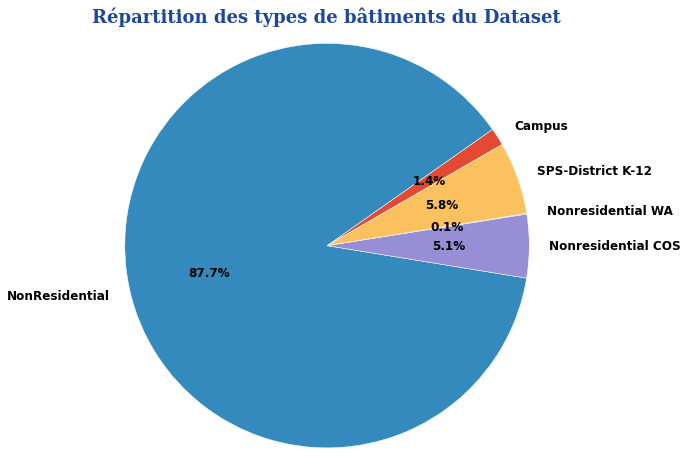

In [ ]:
datas= datas[~datas['BuildingType'].str.contains("Multifamily") & ~datas['PrimaryPropertyType'].str.contains("Multifamily")]


building_type = datas.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

In [ ]:
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    577
Other                          377
Large Office                   332
Mixed Use Property             201
Retail Store                   190
Warehouse                      180
Non-Refrigerated Warehouse     180
Hotel                          149
Worship Facility               143
Distribution Center            102
Medical Office                  80
K-12 School                     78
Supermarket/Grocery Store       75
Self-Storage Facility           56
Senior Care Community           39
Refrigerated Warehouse          25
Restaurant                      22
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Laboratory                      11
Low-Rise Multifamily             3
Name: PrimaryPropertyType, dtype: int64

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 0 to 3375
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3296 non-null   int64  
 1   DataYear                         3296 non-null   int64  
 2   BuildingType                     3296 non-null   object 
 3   PrimaryPropertyType              3296 non-null   object 
 4   PropertyName                     3296 non-null   object 
 5   Address                          3296 non-null   object 
 6   City                             3296 non-null   object 
 7   State                            3296 non-null   object 
 8   ZipCode                          3280 non-null   float64
 9   TaxParcelIdentificationNumber    3295 non-null   object 
 10  CouncilDistrictCode              3296 non-null   int64  
 11  Neighborhood                     3296 non-null   object 
 12  Latitude            

###Année de construction :

Certains immeubles sont anciens et datent de 1900. Cependant, tant qu'ils sont fonctionnels, on peut les inclure dans notre étude et nos modèles.

In [ ]:
build = datas.sort_values(["YearBuilt"])
display(build)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
934,20237,2015,NonResidential,Retail Store,RETAIL,4315 UNIVERSITY WAY NE,SEATTLE,WA,98105.0,1142000160,4,NORTHEAST,47.66032,-122.313484,1900,1,3,32960,0,32960,Retail Store,Retail Store,32960.0,NaN,NaN,64.0,27.000000,27.000000,84.700000,84.700000,889225.00,8.892250e+05,0.0000,2.606170e+05,889262.0,0.000000,0.0,Yes,Compliant,6.20,0.07
255,382,2016,NonResidential,Small- and Mid-Sized Office,Collins Building,524 2nd Ave,Seattle,WA,98104.0,0939000025,7,DOWNTOWN,47.60227,-122.332020,1900,1,5,50176,0,50176,"Office, Other, Restaurant",Office,50328.0,Other,8329.0,77.0,46.599998,46.599998,143.199997,143.199997,2933288.75,2.933289e+06,0.0000,8.313759e+05,2836654.0,966.340027,96634.0,False,Compliant,24.91,0.50
217,340,2016,NonResidential,Small- and Mid-Sized Office,The Pioneer Building,600 First Ave,Seattle,WA,98104.0,0939000150,7,DOWNTOWN,47.60219,-122.333470,1900,1,6,89355,0,89355,"Office, Retail Store",Office,82355.0,Retail Store,7000.0,66.0,46.799999,46.900002,145.399994,145.500000,4178233.50,4.188309e+06,0.0000,1.206507e+06,4116601.0,616.320007,61632.0,False,Compliant,31.97,0.36
216,339,2016,NonResidential,Small- and Mid-Sized Office,Broderick Building,615 2nd Avenue,Seattle,WA,98104.0,0939000130,7,DOWNTOWN,47.60266,-122.333320,1900,1,7,89550,0,89550,"Office, Retail Store, Social/Meeting Hall",Office,64712.0,Retail Store,10058.0,85.0,47.700001,50.599998,141.600006,148.800003,3903259.75,4.135330e+06,348386.8125,1.041874e+06,3554872.0,0.000000,0.0,False,Compliant,51.67,0.58
198,318,2016,NonResidential,Mixed Use Property,Pier 54,1001 Alaskan Way,Seattle,WA,98104.0,7666202495,7,DOWNTOWN,47.60410,-122.339580,1900,1,1,62900,0,62900,"Other, Restaurant, Retail Store",Restaurant,32494.0,Other,29793.0,NaN,158.300003,165.699997,286.700012,294.600006,10394330.00,1.088387e+07,0.0000,1.110180e+06,3787933.0,66063.968750,6606397.0,False,Compliant,377.27,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,50035,2016,NonResidential,Hotel,Hilton Garden Inn Seattle,1821 Boren Ave,Seattle,WA,98101.0,3374400010,7,DOWNTOWN,47.61665,-122.332610,2015,1,14,144614,0,144614,Hotel,Hotel,159500.0,NaN,NaN,89.0,34.599998,34.799999,105.400002,105.599998,5525072.50,5.547964e+06,0.0000,1.544316e+06,5269208.0,2558.640137,255864.0,False,Compliant,50.32,0.35
3356,50094,2016,NonResidential,Mixed Use Property,AIBS,601 Westlake Ave N.,Seattle,WA,98109.0,4088803385,7,LAKE UNION,47.62497,-122.338830,2015,1,6,345290,85028,260262,"Data Center, Laboratory, Museum, Office, Other...",Laboratory,151523.0,Office,106498.0,NaN,144.500000,150.800003,333.100006,335.799988,39364116.00,4.107860e+07,0.0000,6.927551e+06,23636804.0,157273.078100,15727308.0,False,Compliant,1000.06,2.90
3347,50081,2016,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,Seattle,WA,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,-122.306500,2015,1,3,45000,0,45000,"K-12 School, Parking",K-12 School,45728.0,Parking,0.0,77.0,29.000000,30.600000,91.099998,96.000000,1325972.75,1.397742e+06,0.0000,3.886204e+05,1325973.0,0.000000,0.0,False,Compliant,9.24,0.21
3322,50039,2016,NonResidential,Other,Honda of Seattle/Toyota of Seattle,2005 Airport Way South,Seattle,WA,98134.0,7666203255,2,G

In [ ]:
datas=datas.drop_duplicates(subset=['OSEBuildingID'], keep='last')



Dans le cadre de notre étude, que l'immeuble date de 2015 ou 2016 importe peu.
On a donc supprimé les immeubles en doublon et gardé que ceux de l'année 2016.


In [ ]:
datas.sort_values(by=['OSEBuildingID'])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47

In [ ]:
datasNR = datas[datas['BuildingType'].str.contains('esidential')]
display(datasNR)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
43,57,2015,NonResidential,Large Office,5th and Pine,1513 5TH AVE,SEATTLE,WA,98101.0,1975700200,7,DOWNTOWN,47.611040,-122.336348,1973,1,5,168115,0,168115,"Data Center, Office, Retail Store",Office,103501.0,Retail Store,65676.0,79.0,54.300000,54.300000,170.700000,170.700000,9.213841e+06,9.213841e+06,0.0,2.700422e+06,9.214222e+06,0.000000,0.000000e+00,No,Compliant,64.23,0.15
204,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,SEATTLE,WA,98101.0,659000005,7,DOWNTOWN,47.611711,-122.336816,1989,1,4,111077,0,111077,NaN,NaN,NaN,NaN,NaN,91.0,60.600000,62.100000,190.200000,195.100000,9.898724e+06,1.015579e+07,0.0,2.901150e+06,9.899135e+06,0.000000,0.000000e+00,No,Compliant,69.01,0.24
272,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,SEATTLE,WA,98101.0,1974700175,7,DOWNTOWN,47.606799,-122.337100,1906,1,6,98370,25920,72450,Office,Office,98370.0,NaN,NaN,45.0,66.300000,66.500000,207.500000,207.700000,6.525887e+06,6.541579e+06,0.0,1.901522e+06,6.488262e+06,379.000000,3.789300e+04,No,Compliant,47.24,0.20
305,435,2015,NonResidential,Other,WASHINGTON STATE CONVENTION CENTER,800 CONVENTION PL,SEATTLE,WA,98101.0,1978200105,7,DOWNTOWN,47.611586,-122.331601,1990,1,6,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,72.000000,73.700000,192.500000,191.300000,7.716457e+07,7.904198e+07,16811018.0,1.720871e+07,5.871856e+07,16374.000000,1.637420e+06,No,Compliant,1793.90,1.10
312,442,2015,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,SEATTLE,WA,98109.0,1991200870,7,LAKE UNION,47.621476,-122.343050,1947,1,4,193788,37854,155934,"Data Center, Office, Other, Parking, Restaurant",Office,138672.0,Parking,47539.0,59.0,105.800000,104.000000,332.300000,326.400000,1.676022e+07,1.646398e+07,0.0,4.912139e+06,1.676091e+07,0.000000,0.000000e+00,No,Compliant,116.84,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.567220,-122.311540,1990,1,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.596250,-122.322830,2004,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.636440,-122.357840,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential CO

On exporte ensuite notre DataSet nettoyé en format csv pour le réutiliser dans les autres Notebooks.

In [ ]:
datasNR.set_index("OSEBuildingID").to_csv("/content/drive/MyDrive/dataSeattle.csv", sep='\t')